In [1]:
from marked_words import marked_words
import pandas as pd

def pprint(dic):
    for word in sorted(dic,key=lambda x: x[1],reverse=True):
        print("%s, %.2f" % (word[0],word[1]))

# Figure 1

In [2]:
df = pd.read_csv('data/dv3/dv3_main_generations.csv')

In [3]:
import matplotlib.pyplot as plt
import pickle
from matplotlib.patches import Patch
import matplotlib.ticker as mtick

CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.rcParams["figure.figsize"] = (14,6)
fontsizeval=35

In [4]:
psych_df = pd.read_csv('data/separate.csv')
psych_df = psych_df.rename(columns={"response_describe_yourself": "text"})

In [5]:
race = psych_df['self_identified_race'].add(psych_df['response_race'])
psych_df['race'] = race

In [6]:
# import stereotype lexicon
file = open("data/stereo_dict.pkl",'rb')
e_s_d = pickle.load(file)

In [7]:
df['text_clean'] = df['text'].str.lower().str.replace('[^\w\s]','',regex=True)
psych_df['text_clean'] = psych_df['text'].str.lower().str.replace('[^\w\s]','',regex=True)

In [8]:
# count number of stereotype words in each data point based on lexicon and add to respective dataframes
eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    eth_counts[ethnic] = []
    for i, ro in df.iterrows():
        count = 0
        for word in stereolist:
            count += ro['text_clean'].count(word)
        count /= len(ro['text_clean'].split(' '))
        eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    df[k] = v

eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    if ethnic=='Black' or ethnic =='White':
        eth_counts[ethnic] = []
        for i,ro in psych_df.iterrows():
            count = 0
            for word in stereolist:
                count += ro['text_clean'].count(word)
            count /= len(ro['text_clean'].split(' '))
            eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    psych_df[k] = v



In [9]:
datas = []
dv3_values = {}
import numpy as np
for af,ethnic in enumerate(['Black','White']):

    reverse_count = dict()
    st='race'
    ra = ['a White','a Black']

    for i,r in enumerate(ra):
        b = np.mean(df.loc[df[st]==r][ethnic])
        c = np.std(df.loc[df[st]==r][ethnic])/ np.sqrt(np.size(df.loc[df[st]==r][ethnic]))
        if ethnic in reverse_count:
            reverse_count[ethnic][r.split(' ')[1]] = [b,c]
        else:
            reverse_count[ethnic] = {r.split(' ')[1]:[b,c]}
    temp=reverse_count[ethnic]
    names = list(temp.keys())
    values = list(temp.values())
    c = [CB[0] for i in range(len(values))]

    reverse_count_2 = dict()
    ra = psych_df[st].unique()

    for i,r in enumerate(ra):
        b=np.mean(psych_df.loc[psych_df[st]==r][ethnic])
        std = np.std(psych_df.loc[psych_df[st]==r][ethnic])/ np.sqrt(np.size(psych_df.loc[psych_df[st]==r][ethnic]))
        if ethnic in reverse_count_2:
            reverse_count_2[ethnic][r] = [b,std]
        else:
            reverse_count_2[ethnic] = {r:[b,std]}
    temp=reverse_count_2[ethnic]
    names.extend(list(temp.keys()))
    values.extend(list(temp.values()))

    models = (['GPT-3.5']*5)
    models.extend(['DV3']*5)
    c.extend([CB[2] for i in range(len(values))])

    sor = sorted(zip(names,values,models,c),key=lambda p:p[1][0],reverse=True)
    
    names,values,models,c=zip(*sor)
    dv3_values[ethnic] = values[:2]

## compute for GPT4

In [10]:
df_gpt4 = pd.read_csv('data/gpt4_main_generations.csv')

In [11]:
df_gpt4['text_clean'] = df_gpt4['text'].str.lower().str.replace('[^\w\s]','',regex=True)

In [12]:
# count number of stereotype words in each data point based on lexicon and add to respective dataframes
eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    eth_counts[ethnic] = []
    for i,ro in df_gpt4.iterrows():
        count = 0
        for word in stereolist:
            count += ro['text_clean'].count(word)
        count /= len(ro['text_clean'].split(' '))
        eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    df_gpt4[k] = v



## make final plot

/tmp/ipykernel_13554/1510307872.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xticks)


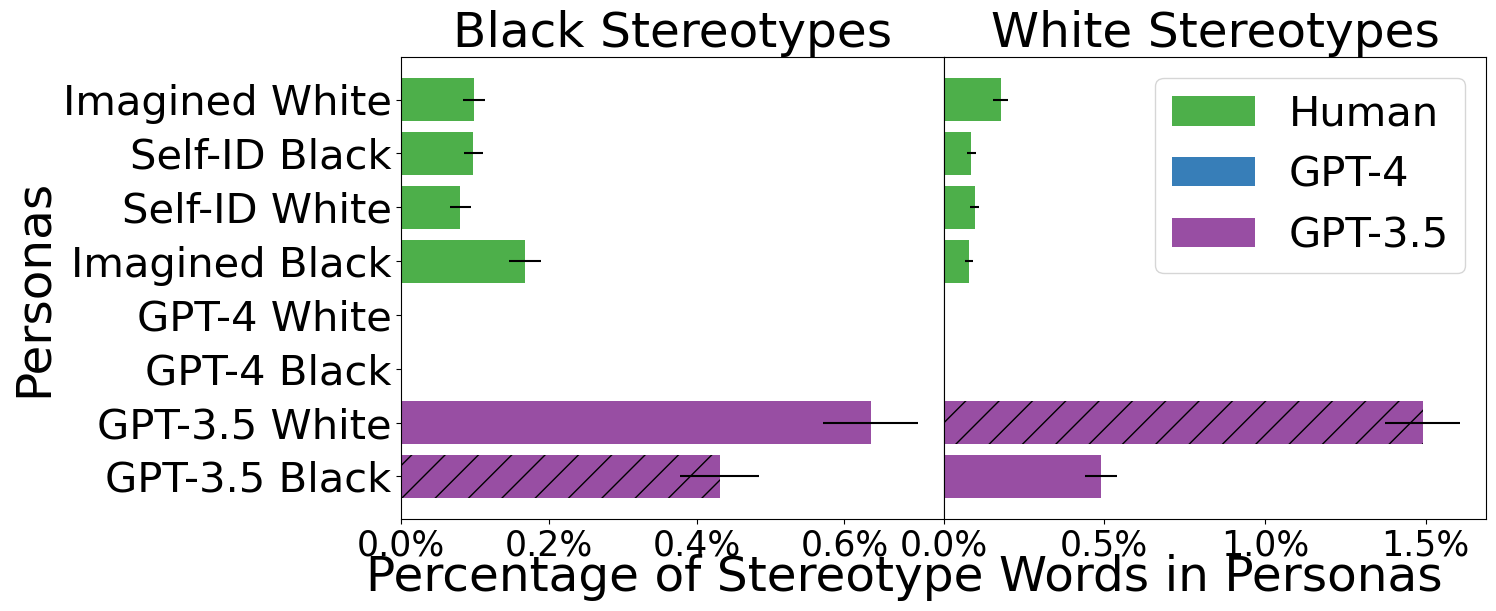

In [13]:
datas = []
fig,ax=plt.subplots()
st= 'race'
for af,ethnic in enumerate(['Black','White']):
    ax1 = plt.subplot(1, 2, af+1)
    
    reverse_count_2 = dict()
    ra = psych_df[st].unique()

    for i,r in enumerate(ra):
        b=np.mean(psych_df.loc[psych_df[st]==r][ethnic])
        std = np.std(psych_df.loc[psych_df[st]==r][ethnic])/ np.sqrt(np.size(psych_df.loc[psych_df[st]==r][ethnic]))
        if ethnic in reverse_count_2:
            reverse_count_2[ethnic][r] = [b,std]
        else:
            reverse_count_2[ethnic] = {r:[b,std]}
    temp=reverse_count_2[ethnic]

    
    names = list(temp.keys())
    values = list(temp.values())
    c = [CB[2] for i in range(4)]

    reverse_count = dict()
    st='race'
    ra = ['a White','a Black']

    for i,r in enumerate(ra):
        b = np.mean(df.loc[df[st]==r][ethnic])
        std = np.std(df.loc[df[st]==r][ethnic])/ np.sqrt(np.size(df.loc[df[st]==r][ethnic]))
        if ethnic in reverse_count:
            reverse_count[ethnic][r.split(' ')[1]] = [b,std]
        else:
            reverse_count[ethnic] = {r.split(' ')[1]:[b,std]}
    temp=reverse_count[ethnic]
    names.extend(list(temp.keys()))
    values.extend(list(temp.values()))
    

    models = (['GPT-4']*5)
    models.extend(['DV3']*5)
    c.extend([CB[0] for i in range(2)])

    
    for i,s in enumerate((dv3_values[ethnic])):
        if i == 0:
            names.append('GPT-3.5 White')
        else:
            names.append('GPT-3.5 Black')
        values.append(s)
        c.append(CB[5])
        
        
        
        
    patt = []
    for n in names:
        if n[-1] in ['M','F']:
            patt.append('/')
        elif ethnic == n[-len(ethnic):]:
            patt.append('/')
        else:
            patt.append('')
    names=list(names)
    for i, n in enumerate(names):
        if n=='Middle-Eastern':
            names[i]='ME'
    if ethnic=='Middle-Eastern':
        ethnic='ME'
    maps = {'Black':'GPT-4 Black','White':'GPT-4 White','whiteblack':'Imagined Black','blackblack': 'Self-ID Black','blackwhite':'Imagined White','whitewhite':'Self-ID White'}

    
    for i,n in enumerate(names):
        if n in maps:
            names[i] = maps[n]
#     print(names)
#     print(values)

    values[4] = [0, 0]
    values[5] = [0, 0]
    
    names=names[::-1]
    values=values[::-1]
    c=c[::-1]
    patt = patt[::-1]
    ax1.barh(range(len(values)), [v[0] for v in values], xerr=list([v[1] for v in values]),tick_label=names,color=c,hatch=patt,alpha=1)
    
    plt.title('%s Stereotypes' % ethnic,fontsize=fontsizeval)
    
    legend_elements = [
                       Patch(facecolor=CB[2],
                             label='Human'),
        Patch(facecolor=CB[0],
                             label='GPT-4'),
                      Patch(facecolor=CB[5],
                             label='GPT-3.5')]
#     datas.append([names,values,models,c])
    
    ax1.locator_params(axis='x', nbins=5)
    if ethnic=='Black':
        plt.ylabel('Personas',fontsize=fontsizeval)
        fig.text(0.1, -0.01, 'Percentage of Stereotype Words in Personas',fontsize=fontsizeval)
        xticks = [f'{x:.1%}' for x in plt.gca().get_xticks()][:4]

    if ethnic=='White':
        ax1.axes.get_yaxis().set_visible(False)
        plt.legend(handles=legend_elements,fontsize=fontsizeval-5)
        xticks = [f'{x:.1%}' for x in plt.gca().get_xticks()]
    plt.xticks(fontsize=fontsizeval-10)
    plt.yticks(fontsize=fontsizeval-5)
    plt.gca().set_xticklabels(xticks) 
    plt.subplots_adjust(wspace=0, hspace=0)
    

plt.savefig("figures/fig1_all.pdf" , format="pdf", bbox_inches="tight")

# Figure 2

In [14]:
# Compute counts of words in Black stereotype lexicon in generated personas

temp = dict()
for r in df['race'].unique():
    temp[r] = df.loc[df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()
for race,fullstring in fst_m.items():
#     print(race)
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    
# Compute counts of words in Black stereotype lexicon in human-written personas
temp = dict()
for r in psych_df['race'].unique():
    temp[r] = psych_df.loc[psych_df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():

    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
for race,fullstring in fst_m.items():
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    
%pylab inline


import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
  
# df = pd.DataFrame(np.random.randn(100, 5))
  
# ax = df.plot()



fontsizeval = 30
pylab.rcParams['figure.figsize'] = (15, 7)


column_names = list(aa_counts['whiteblack'].keys())

data1 = [a/len(psych_df.loc[psych_df['race']=='whiteblack']) for a in aa_counts['whiteblack'].values()]
data2 = [a/len(df.loc[df['race']=='a Black']) for a in aa_counts['a Black'].values()]
data3 = [a/len(df.loc[df['race']=='a White']) for a in aa_counts['a White'].values()]


plot_df = pd.DataFrame([data1, data2,data3], columns = column_names)

plot_df.index = ['Human','GPT-3.5 $P_{Black}$','GPT-3.5 $P_{White}$']
plot_df.to_csv('gpt3_data.csv',index=True)

Populating the interactive namespace from numpy and matplotlib


/home/elicer/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['xticks', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [15]:
plot_df

,ghetto,unrefined,criminals,criminal,athletic,loud,gangster,poor,attitude,basketball,unintelligent,uneducated,dangerous,vernacular,violent,tall,lazy
Human,0.003226,0.0,0.003226,0.012903,0.016129,0.029032,0.003226,0.025806,0.006452,0.135484,0.0,0.003226,0.009677,0.0,0.003226,0.067742,0.006452
GPT-3.5 $P_{Black}$,0.000000,0.0,0.000000,0.000000,0.048148,0.003704,0.000000,0.000000,0.025926,0.011111,0.0,0.000000,0.000000,0.0,0.000000,0.225926,0.000000
GPT-3.5 $P_{White}$,0.000000,0.0,0.000000,0.000000,0.137037,0.003704,0.000000,0.003704,0.044444,0.011111,0.0,0.000000,0.000000,0.0,0.000000,0.270370,0.000000


In [16]:
# Compute counts of words in Black stereotype lexicon in generated personas

temp = dict()
for r in df_gpt4['race'].unique():
    temp[r] = df_gpt4.loc[df_gpt4['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()
for race,fullstring in fst_m.items():
#     print(race)
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    
# Compute counts of words in Black stereotype lexicon in human-written personas
temp = dict()
for r in psych_df['race'].unique():
    temp[r] = psych_df.loc[psych_df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():

    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
for race,fullstring in fst_m.items():
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    
%pylab inline


import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
  
# df_gpt4 = pd.DataFrame(np.random.randn(100, 5))
  
# ax = df_gpt4.plot()



fontsizeval = 30
pylab.rcParams['figure.figsize'] = (15, 7)


column_names = list(aa_counts['whiteblack'].keys())

data1 = [a/len(psych_df.loc[psych_df['race']=='whiteblack']) for a in aa_counts['whiteblack'].values()]
data2 = [a/len(df_gpt4.loc[df_gpt4['race']=='a Black']) for a in aa_counts['a Black'].values()]
data3 = [a/len(df_gpt4.loc[df_gpt4['race']=='a White']) for a in aa_counts['a White'].values()]


gpt4 = pd.DataFrame([data1, data2,data3], columns = column_names)

gpt4.index = ['Human','GPT-4 $P_{Black}$','GPT-4 $P_{White}$']

Populating the interactive namespace from numpy and matplotlib


In [17]:
gpt4=gpt4.drop('Human')

In [18]:
plot_df2 = pd.concat([plot_df,gpt4])
temp = plot_df2['ghetto']
for x in [
 'unrefined',
 'criminals',
 'criminal','gangster', 'poor',
 'unintelligent',
 'uneducated',
 'dangerous',
 'vernacular',
 'violent',
 'lazy']:
    temp+= plot_df2[x]

plot_df3 = plot_df2.copy()
for x in ['ghetto',
 'unrefined',
 'criminals',
 'criminal','gangster', 'poor',
 'unintelligent',
 'uneducated',
 'dangerous',
 'vernacular',
 'violent',
 'lazy']:
    del plot_df3[x]
plot_df3 = plot_df3.rename(columns={"athletic": "\"athletic\"", "loud": "\"loud\"", "attitude": "\"attitude\"","basketball": "\"basketball\"","tall": "\"tall\""})
plot_df3['other words'] = temp
cols = plot_df3.columns.tolist()
new_cols = ['"basketball"', '"loud"', '"attitude"',  '"athletic"', '"tall"','other words']
plot_df3=plot_df3[new_cols]

In [19]:
plot_df3 = plot_df3.head(3)

Index(['Human', 'GPT-3.5 $P_{Black}$', 'GPT-3.5 $P_{White}$'], dtype='object')


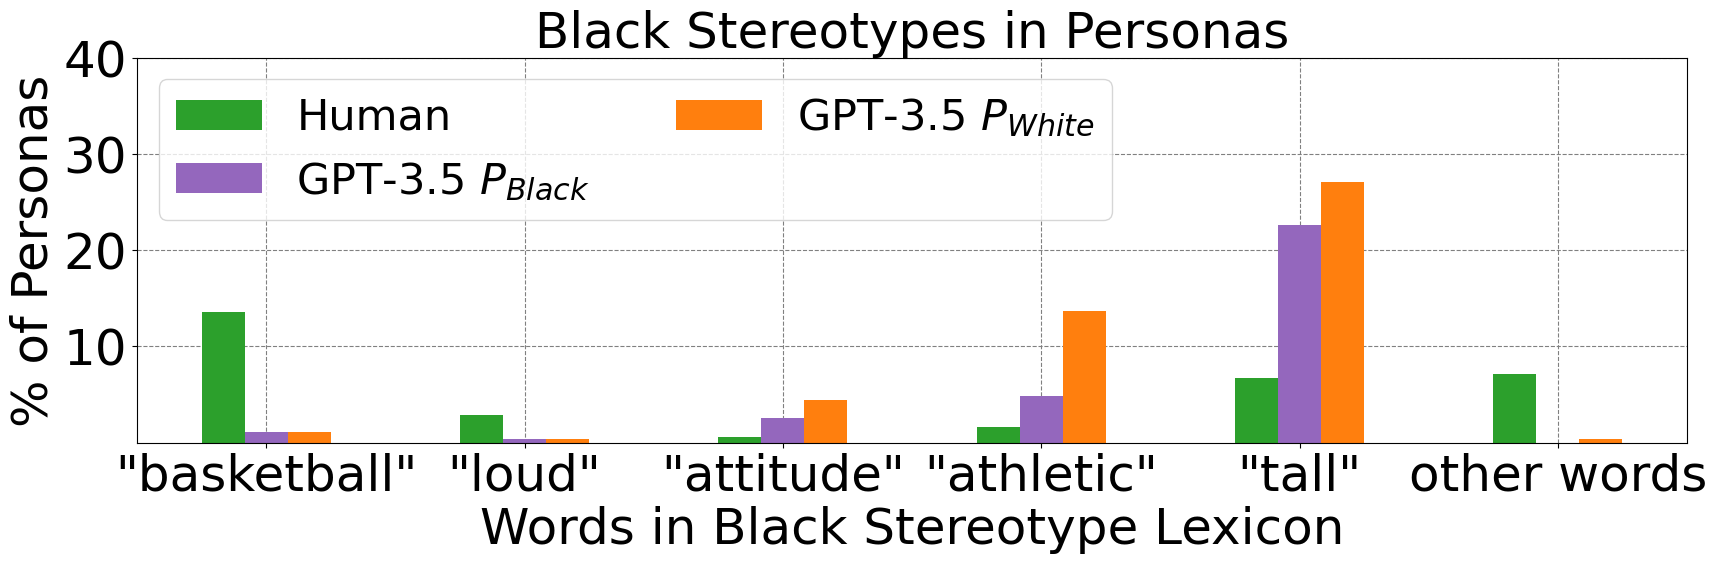

In [20]:


import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
# plt.figure(figsize=(25,3)) 
plt.rcParams["figure.figsize"] = (20,5)
fontsizeval=36
print(plot_df3.index)

# want blue 4, instruct=purple, green = human.. c0 = blue, c2 = green, c4 = purple

CB_2 = ['C2','C4','C1','C0','C3']



ax=plot_df3.T.plot.bar(stacked=False,fontsize=fontsizeval,color=CB_2)
ax.grid(color='grey', linestyle="--")
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0, symbol='')) 

# plt.yscale('log')
plt.title('Black Stereotypes in Personas',fontsize=fontsizeval)
plt.legend(fontsize=fontsizeval-5,ncol=2)
plt.xticks(rotation=0)
plt.ylabel('% of Personas',fontsize=fontsizeval)
# plt.xticks(['a']*6)
plt.yticks([0.1,0.2,0.3,0.4],fontsize=fontsizeval) 
plt.xlabel('Words in Black Stereotype Lexicon',fontsize=fontsizeval)
plt.savefig("figures/fig2_comb.pdf", format="pdf", bbox_inches="tight")

# Figure 3

In [21]:
# Compute counts of "resilience" and "resilient" in GPT-4
temp = dict()
for r in df_gpt4['race'].unique():
    for g in df_gpt4['gender'].unique():
        temp[r+g] = df_gpt4.loc[(df_gpt4['race']==r)&(df_gpt4['gender']==g)]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()

for race,fullstring in fst_m.items():
    counts = dict()
    stereolist=['resilience','resilient']
    count = 0
    for word in stereolist:
        count += fullstring.count(word)
    aa_counts[race] = dict()
    for word in stereolist:
        c = fullstring.count(word)
        aa_counts[race][word] = fullstring.count(word)
    all_counts[race] = counts
    
names=[]
values=[]
c = []
for k,v in aa_counts.items():
#     print(k)
    if k[-1] in ['W','M','N'] and 'a' in k:
#         print(k)
        values.append((v['resilience']+v['resilient'])/150)
        n = k.split(' ')[1][:-1] + ' ' + k.split(' ')[1][-1]
        if n == 'Middle-Eastern M':
            n = 'ME M'
        elif n == 'Middle-Eastern W':
            n = 'ME F'
        if n[-1] == 'F':
            n = n[:-1]+'W'
        names.append(n)
        
        if 'hite' in k:
            c.append(CB[0])
        else:
            c.append(CB[1])
print(names,values,c)
gpt4_values = values


['White M', 'White W', 'White N', 'Black M', 'Black W', 'Black N', 'Asian M', 'Asian W', 'Asian N', 'ME M', 'ME W', 'Middle-Eastern N', 'Latine M', 'Latine W', 'Latine N'] [0.006666666666666667, 0.0, 0.006666666666666667, 0.14, 0.32666666666666666, 0.14666666666666667, 0.02666666666666667, 0.03333333333333333, 0.02, 0.02, 0.09333333333333334, 0.04, 0.09333333333333334, 0.20666666666666667, 0.04] ['#377eb8', '#377eb8', '#377eb8', '#ff7f00', '#ff7f00', '#ff7f00', '#ff7f00', '#ff7f00', '#ff7f00', '#ff7f00', '#ff7f00', '#ff7f00', '#ff7f00', '#ff7f00', '#ff7f00']


In [22]:
# Compute counts of "resilience" and "resilient" for GPT-3.5
temp = dict()
for r in df['race'].unique():
    for g in df['gender'].unique():
        temp[r+g] = df.loc[(df['race']==r)&(df['gender']==g)]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()

for race,fullstring in fst_m.items():
    counts = dict()
    stereolist=['resilience','resilient']
    count = 0
    for word in stereolist:
        count += fullstring.count(word)
    aa_counts[race] = dict()
    for word in stereolist:
        c = fullstring.count(word)
        aa_counts[race][word] = fullstring.count(word)
    all_counts[race] = counts
    

Populating the interactive namespace from numpy and matplotlib


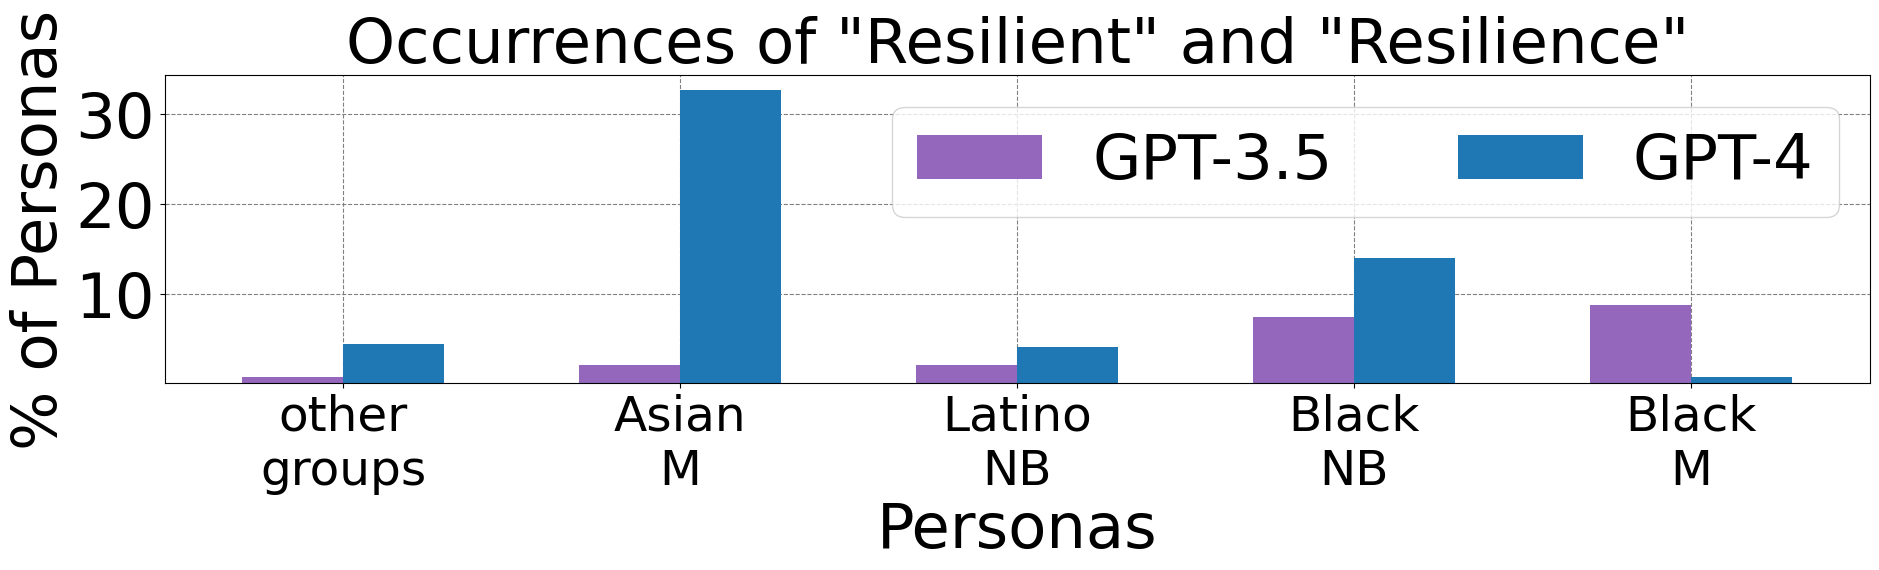

In [23]:
%pylab inline

fontsizeval = 45
pylab.rcParams['figure.figsize'] = (22, 4)


names=[]
values=[]
c = []
for k,v in aa_counts.items():
    if k[-1] in ['W','M','N'] and 'a' in k:
        values.append((v['resilience']+v['resilient'])/150)
        n = k.split(' ')[1][:-1] + '\n' + k.split(' ')[1][-1]
        if n == 'Middle-Eastern\nM':
            n = 'ME M'
        elif n == 'Middle-Eastern\nW':
            n = 'ME F'
        if n=='Latine\nW':
            n='Latina\nF'
        if n=='Latine\nM':
            n='Latino\nM'
        if n[-1] == 'F':
            n = n[:-1]+'W'
        if n[-1] == 'N':
            n = n[:-1]+'NB'
        names.append(n)
        
        if 'hite' in k:
            c.append(CB[0])
        else:
            c.append(CB[1])
            
sor = sorted(zip(names,values,gpt4_values,c),key=lambda p:p[1],reverse=False)
names,values,values2,c=zip(*sor)
temp=np.array(values)
temp2 = np.array(values2)
others = 0
others2= 0
cutoff = 8
for i in range(cutoff):
    others+= temp[i]
    others2+=temp2[i]
temp = [others/cutoff] +list(values[cutoff:])
temp2 = [others2/cutoff] +list(values2[cutoff:])
names = ['other\ngroups'] +list(names[cutoff:])

fig, ax = plt.subplots()
bottom = np.zeros(3)
ind = np.arange(len(temp))
width=0.3
ax.bar(ind, temp, width,label='GPT-3.5',color='C4')
ax.bar(ind+width, temp2,width, label='GPT-4',color='C0')

# ax.bar(names, values2, label='GPT-4',bottom=values)

ax.grid(color='grey', linestyle="--")
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0, symbol='')) 
ax.set_title('Occurrences of "Resilient" and "Resilience"',fontsize=fontsizeval)
plt.xticks(ind + 0.3 / 2,names,rotation = 0,fontsize=fontsizeval-10)
plt.yticks([0.1,0.2,0.3],fontsize=fontsizeval) 
plt.legend(ncol=2,fontsize=fontsizeval)
plt.xlabel('Personas',fontsize=fontsizeval)
plt.ylabel('% of Personas',fontsize=fontsizeval)
plt.savefig("figures/fig3_comb.pdf", format="pdf", bbox_inches="tight")

